# OLYMPICS GAMES ANALYSIS (SUMMER + WINTER)

In [1]:
#Lets Start with out Journey of analysing the Summer and Winter Olympics.
#Lets call all our friends for some help.

import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import re

In [2]:
#Now to do the analysis, we need datasets, why we're waiting call them.
#This dataset is taken from Kaggle and is updated before 4 months.

bio = pd.read_csv('Olympic_Athlete_Bio.csv')
event_results = pd.read_csv('Olympic_Athlete_Event_Results.csv')
medal_tally = pd.read_csv('Olympic_Games_Medal_Tally.csv')
results = pd.read_csv('Olympic_Results.csv')
countries = pd.read_csv('Olympics_Country.csv')
games = pd.read_csv('Olympics_Games.csv')

We Should look how our Data looks like, and take a break and understand which column is important an which is not.

### Datasets and what their Columns represents.

#### 1) bio : 
1. athlete_id: athlete_id contains unique id given to every candidate participating in Olympics. It is unique for every athlete.
2. name, sex: Name and Sex of athletes. Sex is a categorical column consisting 2 categories Male(74%) and Female(26%).
3. born : Date of birth of candidates. This column is not that much useful as individual but we can extract age of the athletes from this one, which may be useful. It contains 3% 'na' values
4. height, weight: Heights(in cm) and weights(in kg) of athletes.Both contains 33% 'na' values.
5. country, country_noc: Country and country code that athletes represent.
6. description: a small description of every athlete, how they started their journey, what game they play, etc in paragraph.
7. special_notes: contains some information of athletes like how many medals they have won and in which category, etc in dotpoints.

In [3]:
bio.head()

athlete_id                 name     sex        born height weight  \
0       16809       Károly Teppert    Male  1891-07-20     na     na   
1       43737    Andrzej Socharski    Male  1947-08-31  173.0     72   
2       50147  Nathalie Wunderlich  Female  1971-06-03  170.0     50   
3        5085           Miha Lokar    Male  1935-09-10  182.0     76   
4      136329          Austin Hack    Male  1992-05-17  203.0    100   

          country country_noc  \
0         Hungary         HUN   
1          Poland         POL   
2     Switzerland         SUI   
3      Yugoslavia         YUG   
4   United States         USA   

                                         description  \
0  Károly Teppert started competing in cycling in...   
1                                                 na   
2                                                 na   
3                                                 na   
4                                                 na   

                                       special_notes  
0                                                 na  
1  Listed in Olympians Who Won a Medal at the Wor...  
2                                                 na  
3  Listed in Olympians Who Won a Medal at the Eur...  
4                                                 na

#### 2) event_results:
1. edition: Contains "Year" - "Season" - "Olympics". Year represents the year in which olympics was held, Season contains Summer/Winter season.
2. edition_id: Olympic Game id which could be useful in retrieving the olympic game url.
3. country_noc: Country Code which the Athlete competes for.
4. sport: The sport for that event. Serves as a parent of multiple events.
5. event: The specific event under a certain sport.
6. result_id: result / event id for the actual events page.
7. athlete: athlete name competing for the event.
8. athlete_id: athlete id which can be used to join with athlete bio.
9. pos: Position that the athlete ranked for the event.
10. medal: whether or not the athlete won a medal, and if so gold, silver, or bronze.Conatins 86% 'na' values i.e. No Medal.
11. isTeamSport: Indicates whether this specific event is a team sport, if yes, then there are other athlete who are also competing for the same country.Contains 2 categories True(38%) and False(62%).

In [4]:
event_results.head()

edition  edition_id country_noc      sport            event  \
0  1908 Summer Olympics           5         ANZ  Athletics  100 metres, Men   
1  1908 Summer Olympics           5         ANZ  Athletics  400 metres, Men   
2  1908 Summer Olympics           5         ANZ  Athletics  800 metres, Men   
3  1908 Summer Olympics           5         ANZ  Athletics  800 metres, Men   
4  1908 Summer Olympics           5         ANZ  Athletics  800 metres, Men   

   result_id          athlete  athlete_id        pos medal  isTeamSport  
0      56265  Ernest Hutcheon       64710        DNS    na        False  
1      56313     Henry Murray       64756        DNS    na        False  
2      56338    Harvey Sutton       64808  3 h8 r1/2    na        False  
3      56338      Guy Haskins      922519        DNS    na        False  
4      56338     Joseph Lynch       64735        DNS    na        False

#### 3) medal_tally:
1. edition: Contains "Year" - "Season" - "Olympics". Year represents the year in which olympics was held, Season contains Summer/Winter season.edition contains  other values i.e. '1956 Equestrian'(the only summer olympic held in nov-dec, many countries boycotted it for various reasons), '1906 Intercalated'(not considered as the official olympic game).Also, we already have 1956 Summer Olympic in our data. So, we can drop both the editions.
2. edition_id: Olympic Game id which could be useful in retrieving the olympic game url.
3. year: year which the game was hosted.
4. country: country which the game was hosted.
5. country_noc: Country Code which the Athlete competes for.
6. gold: gold medal count.
7. silver: silver medal count.
8. bronze: bronze medal count.
9. total: total medal count.

In [5]:
medal_tally.head()

edition  edition_id  year        country country_noc  gold  \
0  1896 Summer Olympics           1  1896  United States         USA    11   
1  1896 Summer Olympics           1  1896         Greece         GRE    10   
2  1896 Summer Olympics           1  1896        Germany         GER     6   
3  1896 Summer Olympics           1  1896         France         FRA     5   
4  1896 Summer Olympics           1  1896  Great Britain         GBR     2   

   silver  bronze  total  
0       7       2     20  
1      18      19     47  
2       5       2     13  
3       4       2     11  
4       3       2      7

#### 4) results:
1. result_id: result / event id for the actual events page.
2. event_title: event title of the result
3. edition: Contains "Year" - "Season" - "Olympics". Year represents the year in which olympics was held, Season contains Summer/Winter season.
4. edition_id: Olympic Game id which could be useful in retrieving the olympic game url.
5. sport: The sport for that event. Serves as a parent of multiple events.
6. sport_url: url for the sport (higher umbrella) to the actual event.
7. result_location: location where the event is hosted.
8. result_participants: the number of participants from number of countries.
9. result_format: the format of the event.
10. result_detail: extra detail about the result.
11. result_description: extra description about the result.
12. start_date: start date of the event.
13. end_date: end date of the event.
14. time: time of the event (unstructured string data).

In [6]:
results.head()

result_id                         event_title               edition  \
0       9270         7 metres, 1907 Rating, Open  1920 Summer Olympics   
1      29722  Featherweight (≤60 kilograms), Men  1980 Summer Olympics   
2      54126                       Platform, Men  1948 Summer Olympics   
3       4684          100 metres Backstroke, Men  1920 Summer Olympics   
4       1465                         Slalom, Men  2002 Winter Olympics   

   edition_id          sport                sport_url  \
0           7        Sailing   /editions/7/sports/SAL   
1          20  Weightlifting  /editions/20/sports/WLF   
2          12         Diving  /editions/12/sports/DIV   
3           7       Swimming   /editions/7/sports/SWM   
4          47  Alpine Skiing  /editions/47/sports/ALP   

                                     result_location   result_participants  \
0                                           Oostende    8 from 2 countries   
1                   Dvorets sporta Izmaylovo, Moskva  18 from 14 countries   
2                     Wembley Arena, Wembley, London  25 from 15 countries   
3               Zwemstadion van Antwerpen, Antwerpen   12 from 6 countries   
4  Park City Mountain Resort, Park City, Utah (Kn...  77 from 43 countries   

                                       result_format result_detail  \
0  Three races, with final places decided by tota...            na   
1  Total of best lifts in snatch and clean & jerk...            na   
2  10 metre platform. Final round only. Four comp...            na   
3                                                 na            na   
4         Two runs, total time determined placement.    Jesse Hunt   

                                  result_description  start_date    end_date  \
0  There were two yachts competing.  Britain’s An...  1920-07-07  1920-07-09   
1  The favorite was likely Soviet Viktor Mazin wh...  1980-07-22          na   
2  Sammy Lee won this event, leading in both the ...  1948-08-04  1948-08-05   
3  Watten Paoa Kealoha set a world record of 1:14...  1920-08-22  1920-08-23   
4  The last few World Cups had gone to Austrian B...  2002-02-23          na   

          time  
0           na  
1  14:00-19:00  
2           na  
3           na  
4           na

#### 5) games:
1. edition: Contains "Year" - "Season" - "Olympics". Year represents the year in which olympics was held, Season contains Summer/Winter season.
2. edition_id: Olympic Game id which could be useful in retrieving the olympic game url.
3. edition_url: edition / olympic game url which could be used to retrive information.
4. year: year which the game was hosted.
5. city: city that the Olympics game was hosted in.
6. country_flag_url: Country flag url for flag image icon.
7. country_noc: country noc code which can be linked to the olympics country csv file for country name.

8. start_date: Start date of the olympics event
9. end_date: end date of the olympics event.
10. competition_date: date on which the olympics event held.
11. isHeld: Whether or not the Olympic game happened or not due to war(92% NaN values).

In [7]:
games.head()

edition  edition_id  edition_url  year       city  \
0  1896 Summer Olympics           1  /editions/1  1896     Athina   
1  1900 Summer Olympics           2  /editions/2  1900      Paris   
2  1904 Summer Olympics           3  /editions/3  1904  St. Louis   
3  1908 Summer Olympics           5  /editions/5  1908     London   
4  1912 Summer Olympics           6  /editions/6  1912  Stockholm   

        country_flag_url country_noc start_date  end_date  \
0  /images/flags/GRE.png         GRE    6 April  15 April   
1  /images/flags/FRA.png         FRA        NaN       NaN   
2  /images/flags/USA.png         USA     14 May       NaN   
3  /images/flags/GBR.png         GBR    13 July       NaN   
4  /images/flags/SWE.png         SWE     6 July   27 July   

        competition_date isHeld  
0           6 – 13 April    NaN  
1    14 May – 28 October    NaN  
2   1 July – 26 November    NaN  
3  27 April – 31 October    NaN  
4        5 May – 27 July    NaN

#### 6) countries:
1. country_noc: country code.
2. country

In [8]:
countries.head()

country_noc         country
0         AFG     Afghanistan
1         ALB         Albania
2         ALG         Algeria
3         ASA  American Samoa
4         AND         Andorra

First, we aim to make a medal tally overall and for each country individually.

In [9]:
#We will use medal_tally dataset for this purpose.
#Let us see whether our data has any duplicate rows or not
medal_tally.duplicated().sum()

0

In [10]:
#Yess, no duplicate rows.
medal_tally.head()

edition  edition_id  year        country country_noc  gold  \
0  1896 Summer Olympics           1  1896  United States         USA    11   
1  1896 Summer Olympics           1  1896         Greece         GRE    10   
2  1896 Summer Olympics           1  1896        Germany         GER     6   
3  1896 Summer Olympics           1  1896         France         FRA     5   
4  1896 Summer Olympics           1  1896  Great Britain         GBR     2   

   silver  bronze  total  
0       7       2     20  
1      18      19     47  
2       5       2     13  
3       4       2     11  
4       3       2      7

Since our data has no column for the season (it is mentioned in the 'edition' column) but we need to analyse our data based on the season so we can form a different column 'season' with the help of the 'edition'.

In [11]:
medal_tally['season'] = medal_tally['edition'].str.split(" ", n=2, expand=True)[1]

In [12]:
medal_tally = medal_tally[(medal_tally['season'] == 'Summer') | (medal_tally['season'] == 'Winter')]

In [13]:
summer = medal_tally[medal_tally['season'] == 'Summer'].groupby('country').sum()[['gold','silver','bronze','total']]

In [14]:
summer

gold  silver  bronze  total
country                                            
Afghanistan                0       0       2      2
Algeria                    5       4       8     17
Argentina                 21      26      30     77
Armenia                    2       8       8     18
Australasia                3       4       5     12
...                      ...     ...     ...    ...
West Germany              56      67      81    204
West Indies Federation     0       0       2      2
Yugoslavia                26      29      28     83
Zambia                     0       1       1      2
Zimbabwe                   3       4       1      8

[153 rows x 4 columns]

In [15]:
winter = medal_tally[medal_tally['season'] == 'Winter'].groupby('country').sum()[['gold','silver','bronze','total']]

In [16]:
winter

gold  silver  bronze  total
country                                                           
Australia                                 6       7       6     19
Austria                                  71      88      91    250
Belarus                                   8       7       5     20
Belgium                                   2       2       4      8
Bulgaria                                  1       2       3      6
Canada                                   77      72      76    225
Croatia                                   4       6       1     11
Czechia                                  10      11      13     34
Czechoslovakia                            2       8      15     25
Democratic People's Republic of Korea     0       1       1      2
Denmark                                   0       1       0      1
East Germany                             39      36      35    110
Estonia                                   4       2       2      8
Finland                                  45      65      65    175
France                                   41      42      55    138
Germany                                 112     104      70    286
Great Britain                            12       5      17     34
Hungary                                   2       2       6     10
Italy                                    42      43      56    141
Japan                                    17      28      31     76
Kazakhstan                                1       3       4      8
Latvia                                    1       3       6     10
Liechtenstein                             2       2       6     10
Luxembourg                                0       2       0      2
Mixed team                                1       0       0      1
Netherlands                              53      49      45    147
New Zealand                               2       2       2      6
Norway                                  148     134     123    405
People's Republic of China               22      32      23     77
Poland                                    7       7       9     23
ROC                                       8      18      23     49
Republic of Korea                        33      30      16     79
Romania                                   0       0       1      1
Russian Federation                       46      39      35    120
Slovakia                                  4       4       2     10
Slovenia                                  4       8      12     24
Soviet Union                             78      57      59    194
Spain                                     1       1       3      5
Sweden                                   65      51      60    176
Switzerland                              63      47      58    168
Ukraine                                   3       2       4      9
Unified Team                              9       6       8     23
United States                           113     122      95    330
Uzbekistan                                1       0       0      1
West Germany                             11      15      13     39
Yugoslavia                                0       3       1      4

In [17]:
medal_tally['season'].value_counts()

Summer    1343
Winter     439
Name: season, dtype: int64

In [18]:
df1 = summer.merge(winter, how='outer', on='country').fillna(0)

In [19]:
df1.head()

gold_x  silver_x  bronze_x  total_x  gold_y  silver_y  bronze_y  \
country                                                                        
Afghanistan     0.0       0.0       2.0      2.0     0.0       0.0       0.0   
Algeria         5.0       4.0       8.0     17.0     0.0       0.0       0.0   
Argentina      21.0      26.0      30.0     77.0     0.0       0.0       0.0   
Armenia         2.0       8.0       8.0     18.0     0.0       0.0       0.0   
Australasia     3.0       4.0       5.0     12.0     0.0       0.0       0.0   

             total_y  
country               
Afghanistan      0.0  
Algeria          0.0  
Argentina        0.0  
Armenia          0.0  
Australasia      0.0

In [20]:
# _S, _W represents values for summer and winter olympics respectively. 
df1.columns = ['Gold_S', 'Silver_S', 'Bronze_S', 'Total_S', 'Gold_W', 'Silver_W', 'Bronze_W', 'Total_W']

In [21]:
# Column for overall medals 
df1['Total Medals'] = df1['Total_S'] + df1['Total_W']

In [22]:
final = df1.sort_values('Total Medals', ascending = False).reset_index()

In [23]:
#Overall medal_tally including every country and their overall medals
final.head()

country  Gold_S  Silver_S  Bronze_S  Total_S  Gold_W  Silver_W  \
0  United States  1069.0     842.0     744.0   2655.0   113.0     122.0   
1   Soviet Union   395.0     319.0     296.0   1010.0    78.0      57.0   
2        Germany   237.0     264.0     290.0    791.0   112.0     104.0   
3  Great Britain   291.0     324.0     313.0    928.0    12.0       5.0   
4         France   231.0     256.0     285.0    772.0    41.0      42.0   

   Bronze_W  Total_W  Total Medals  
0      95.0    330.0        2985.0  
1      59.0    194.0        1204.0  
2      70.0    286.0        1077.0  
3      17.0     34.0         962.0  
4      55.0    138.0         910.0

In [24]:
#converting values into integer(number of medals can not be decimal) just for better presentation
final['Gold_S'] = final['Gold_S'].astype('int')
final['Silver_S'] = final['Silver_S'].astype('int')
final['Bronze_S'] = final['Bronze_S'].astype('int')
final['Total_S'] = final['Total_S'].astype('int')
final['Gold_W'] = final['Gold_W'].astype('int')
final['Silver_W'] = final['Silver_W'].astype('int')
final['Bronze_W'] = final['Bronze_W'].astype('int')
final['Total_W'] = final['Total_W'].astype('int')
final['Total Medals'] = final['Total Medals'].astype('int')

In [25]:
final

country  Gold_S  Silver_S  Bronze_S  Total_S  Gold_W  Silver_W  \
0    United States    1069       842       744     2655     113       122   
1     Soviet Union     395       319       296     1010      78        57   
2          Germany     237       264       290      791     112       104   
3    Great Britain     291       324       313      928      12         5   
4           France     231       256       285      772      41        42   
..             ...     ...       ...       ...      ...     ...       ...   
149   Turkmenistan       0         1         0        1       0         0   
150       Djibouti       0         0         1        1       0         0   
151          Tonga       0         1         0        1       0         0   
152           Togo       0         0         1        1       0         0   
153           Iraq       0         0         1        1       0         0   

     Bronze_W  Total_W  Total Medals  
0          95      330          2985  
1          59      194          1204  
2          70      286          1077  
3          17       34           962  
4          55      138           910  
..        ...      ...           ...  
149         0        0             1  
150         0        0             1  
151         0        0             1  
152         0        0             1  
153         0        0             1  

[154 rows x 10 columns]

In [26]:
# list of unique years, countries and season
# We have not used this command in the notebook but have used it in streamlit app for dropdown menu. 
years = np.unique(medal_tally['year']).tolist()
years.insert(0,'Overall')
country = np.unique(medal_tally['country']).tolist()
country.insert(0,'Overall')
season = np.unique(medal_tally['season']).tolist()
season.insert(0,'Overall')

In [27]:
def fetch_values(year, country, season):
    if year == 'Overall' and country == 'Overall' and season == 'Overall':
        df2 = final
    if year == 'Overall' and country == 'Overall' and season != 'Overall':
        df2 = medal_tally[medal_tally['season'] == season].sort_values('total', ascending=False).reset_index(drop=True) 
    if year == 'Overall' and country != 'Overall' and season == 'Overall':
        df2 = medal_tally[medal_tally['country'] == country].sort_values('total', ascending=False).reset_index(drop=True)
    if year != 'Overall' and country == 'Overall' and season == 'Overall':
        df2 = medal_tally[medal_tally['year'] == year].sort_values('total', ascending=False).reset_index(drop=True)
    if year != 'Overall' and country != 'Overall' and season == 'Overall':
        df2 = medal_tally[(medal_tally['country'] == country) & (medal_tally['year'] == year)].sort_values('total', ascending=False).reset_index(drop=True)
    if year == 'Overall' and country != 'Overall' and season != 'Overall':
        df2 = medal_tally[(medal_tally['country'] == country) & (medal_tally['season'] == season)].sort_values('total', ascending=False).reset_index(drop=True)
    if year != 'Overall' and country == 'Overall' and season != 'Overall':
        df2 = medal_tally[(medal_tally['season'] == season) & (medal_tally['year'] == year)].sort_values('total', ascending=False).reset_index(drop=True)
    if year != 'Overall' and country != 'Overall' and season != 'Overall':
        df2 = medal_tally[(medal_tally['country'] == country) & (medal_tally['year'] == year) & (medal_tally['season'] == season)].sort_values('total', ascending=False).reset_index(drop=True)
        
    display(df2)

In [28]:
fetch_values(year = 2012, country= 'India', season = 'Overall')

edition  edition_id  year country country_noc  gold  silver  \
0  2012 Summer Olympics          54  2012   India         IND     0       2   

   bronze  total  season  
0       4      6  Summer

## Overall Analysis 


### 1. Total number of unique years, countries, sports, names, editions, events (Including Summer and Winter Olympics) 

In [29]:
print("OVERALL STATISTICS :-")
print("Total number of unique Years : ", medal_tally['year'].unique().shape[0])
print("Total number of unique Countries : ", medal_tally['country'].unique().shape[0])
print("Total number of unique Sports : ", event_results['sport'].unique().shape[0])
print("Total number of unique Names : ", bio['name'].unique().shape[0])
print("Total number of unique Editions : ", event_results['edition'].unique().shape[0])
print("Total number of unique Events : ", event_results['event'].unique().shape[0])

OVERALL STATISTICS :-
Total number of unique Years :  37
Total number of unique Countries :  154
Total number of unique Sports :  108
Total number of unique Names :  151955
Total number of unique Editions :  55
Total number of unique Events :  916


Since we do not have 'year' and 'season' column individually in our dataset 'event_results' , So we can extract it from the column 'edition' to do analysis on both of them respectively. 

### 2. Analysis of athletes, events and countries over the years:

In [30]:
# Forming new columns i.e. 'year' and 'season' from the old column 'edition'.
event_results['year'] = event_results['edition'].str.split(" ", n=2, expand=True)[0]
event_results['season'] = event_results['edition'].str.split(" ", n=2, expand=True)[1]


In [31]:
event_results.head(1)

edition  edition_id country_noc      sport            event  \
0  1908 Summer Olympics           5         ANZ  Athletics  100 metres, Men   

   result_id          athlete  athlete_id  pos medal  isTeamSport  year  \
0      56265  Ernest Hutcheon       64710  DNS    na        False  1908   

   season  
0  Summer

### a) Countries participated over the years in Summer and Winter Olympics

In [32]:
# We have 'country_noc' i.e. the unique code for every country but not the country name in our data set 'event_results' so 
# merging it with 'countries' dataset to get country name along with the country code.
df = event_results.merge(countries, on='country_noc')
df1 = df.drop_duplicates(['edition', 'country']).reset_index(drop=True)

In [33]:
# forming two datasets on the basis of season i.e. Summer and Winter
country_count_of_summer_olympics = df1[df1['season'] == 'Summer']
country_count_of_winter_olympics = df1[df1['season'] == 'Winter']

In [34]:
# calculating no. of countries over the years in Summer Olympics. 
summer_country_table = country_count_of_summer_olympics['year'].value_counts().reset_index().sort_values('index')
summer_country_table.rename(columns={'index': 'Year', 'year': 'Number of Countries Participated'}, inplace=True)

In [35]:
summer_country_table

Year  Number of Countries Participated
27  1896                                13
25  1900                                27
28  1904                                10
26  1908                                23
23  1912                                29
24  1920                                29
22  1924                                45
21  1928                                46
20  1932                                47
19  1936                                49
18  1948                                59
16  1952                                69
17  1956                                67
14  1960                                83
12  1964                                93
11  1968                               112
10  1972                               121
13  1976                                92
15  1980                                80
9   1984                               140
8   1988                               159
7   1992                               169
6   1996                               197
5   2000                               200
4   2004                               201
3   2008                               204
2   2012                               205
0   2016                               207
1   2020                               207

From the graph, we can see that the participation of countries over the years has increased. Also, we can see in 1980 there was a huge downfall in the participation of countries. 1980 Summer Olympics were held in Moscow. Soviet Union invaded Afghanistan in 1979 after which the US gave a deadline to the Soviet Union to withdraw their troops. US President announced that they will boycott Summer Olympics since the Soviet Union did not withdraw its troops from Afghanistan. Canada, West Germany, Japan and some other countries also supported the US and boycotted the 1980 Olympics. That's why there is a huge downfall of countries that participated in 1980.

In [36]:
fig1 = px.line(summer_country_table, x="Year", y="Number of Countries Participated")
fig1.show()

In [37]:
# calculating no. of countries over the years in Winter Olympics. 
winter_country_table = country_count_of_winter_olympics['year'].value_counts().reset_index().sort_values('index')
winter_country_table.rename(columns = {'index':'Year', 'year':'Number of Countries Participated'}, inplace = True)

Since the 1980 Winter Olympics we held in US, there was not dispute between the countries to boycott the Olympics.

In [38]:
fig2 = px.line(winter_country_table, x="Year", y="Number of Countries Participated")
fig2.show()

### b) Athletes participated over the years in Summer and Winter Olympics

In [39]:
# dividing data on the basis of season.
df2 = df.drop_duplicates(['edition', 'athlete_id']).reset_index(drop=True)
athlete_count_of_summer_olympics = df2[df2['season'] == 'Summer']
athlete_count_of_winter_olympics = df2[df2['season'] == 'Winter']

In [40]:
# Calculating no. of athletes over the years in Summer Olympics.
summer_athlete_table = athlete_count_of_summer_olympics['year'].value_counts().reset_index().sort_values('index')
summer_athlete_table.rename(columns = {'index':'Year', 'year':'Number of Athletes Participated'}, inplace = True)

1. 1932 Summer Olympics: The 1932 Olympic Games were held in the middle of the Great Depression(stock market crash) and, given the transport links of the time, in the relatively remote region of California.The Great Depression was the worst economic downturn in the history of the industrialized world, lasting from the stock market crash of 1929 to 1939. The Great Depression was the worst economic crisis in modern history, lasting from 1929 until the beginning of World War II in 1939.Consequently, participation in the Games was the lowest since 1904, with only half as many athletes taking part as had in 1928.
2. 1956 Summer Olympics: Although the number of countries participating was almost the same as in 1952, the number of athletes competing dropped sharply. Also, these were the only Summer Olympics held in Oct/Nov.
3. 1980 Summer Olympics: The same reason, since many countries boycotted the Olympics that year, no. of athletes participated is also less.

In [41]:
fig3 = px.line(summer_athlete_table, x="Year", y="Number of Athletes Participated")
fig3.show()

In [42]:
# Calculating no. of athletes over the years in Winter Olympics.
winter_athlete_table = athlete_count_of_winter_olympics['year'].value_counts().reset_index().sort_values('index')
winter_athlete_table.rename(columns = {'index':'Year', 'year':'Number of Athletes Participated'}, inplace = True)

In [43]:
fig4 = px.line(winter_athlete_table, x="Year", y="Number of Athletes Participated")
fig4.show()

### c) Events held over the years in Summer and Winter Olympics

In [44]:
# dividing data on the basis of season.
df3 = df.drop_duplicates(['edition', 'event']).reset_index(drop=True)
event_count_of_summer_olympics = df3[df3['season'] == 'Summer']
event_count_of_winter_olympics = df3[df3['season'] == 'Winter']

In [45]:
# calculating no. of events held over the years in Summer Olympics.
summer_event_table = event_count_of_summer_olympics['year'].value_counts().reset_index().sort_values('index')
summer_event_table.rename(columns = {'index':'Year', 'year':'Number of Events'}, inplace = True)

There was an infusion of new event in the Olympics of 1900. Most of them were not officially the part of Olympics and later discontinued.

In [46]:
fig5 = px.line(summer_event_table, x="Year", y="Number of Events")
fig5.show()

In [47]:
# calculating no. of events held over the years in Winter Olympics.
winter_event_table = event_count_of_winter_olympics['year'].value_counts().reset_index().sort_values('index')
winter_event_table.rename(columns = {'index':'Year', 'year':'Number of Events'}, inplace = True)

In [48]:
fig6 = px.line(winter_event_table, x="Year", y="Number of Events")
fig6.show()

### 3. Number of events in every sport over the years in Summer Olympics. 

In [49]:
x_summer = df[df['season'] == 'Summer'].drop_duplicates(['year', 'sport', 'event']).reset_index(drop=True)

1. From the heatmap, it can be seen that most of the events held are from Athletics followed by Swimming and Wrestling.
2. Since in 1900 and 1904 many new events were introduced (in athletics too) which later on discontinued, the number is high for those years. 
3. Also in our data, events for Men, Women and disabled people are categorised different.
4. Ballooning sport had 26 events in 1900, but after that this sport was discontinued. 1900 was the only year Ballooning was in Olympics. Some other sports are also in the list like Boules, Croquet, Equestrian driving, Fishing, MotorCycle Sports, Cricket.
5. Many games were introduced in different years but played only once or twice and discontinued further like Aeronautics, Kendo etc.
6. Art Competitions were consist many events till 1952 then they were discontinued.
7. In recent, Artistic Gymnastics, Boxing, Canoe Sprint, Cycling track, Fencing, Judo, Shooting, Rowing, Weightlifting are played the most after the top 3 sports mentioned in 1.

<AxesSubplot:xlabel='year', ylabel='sport'>

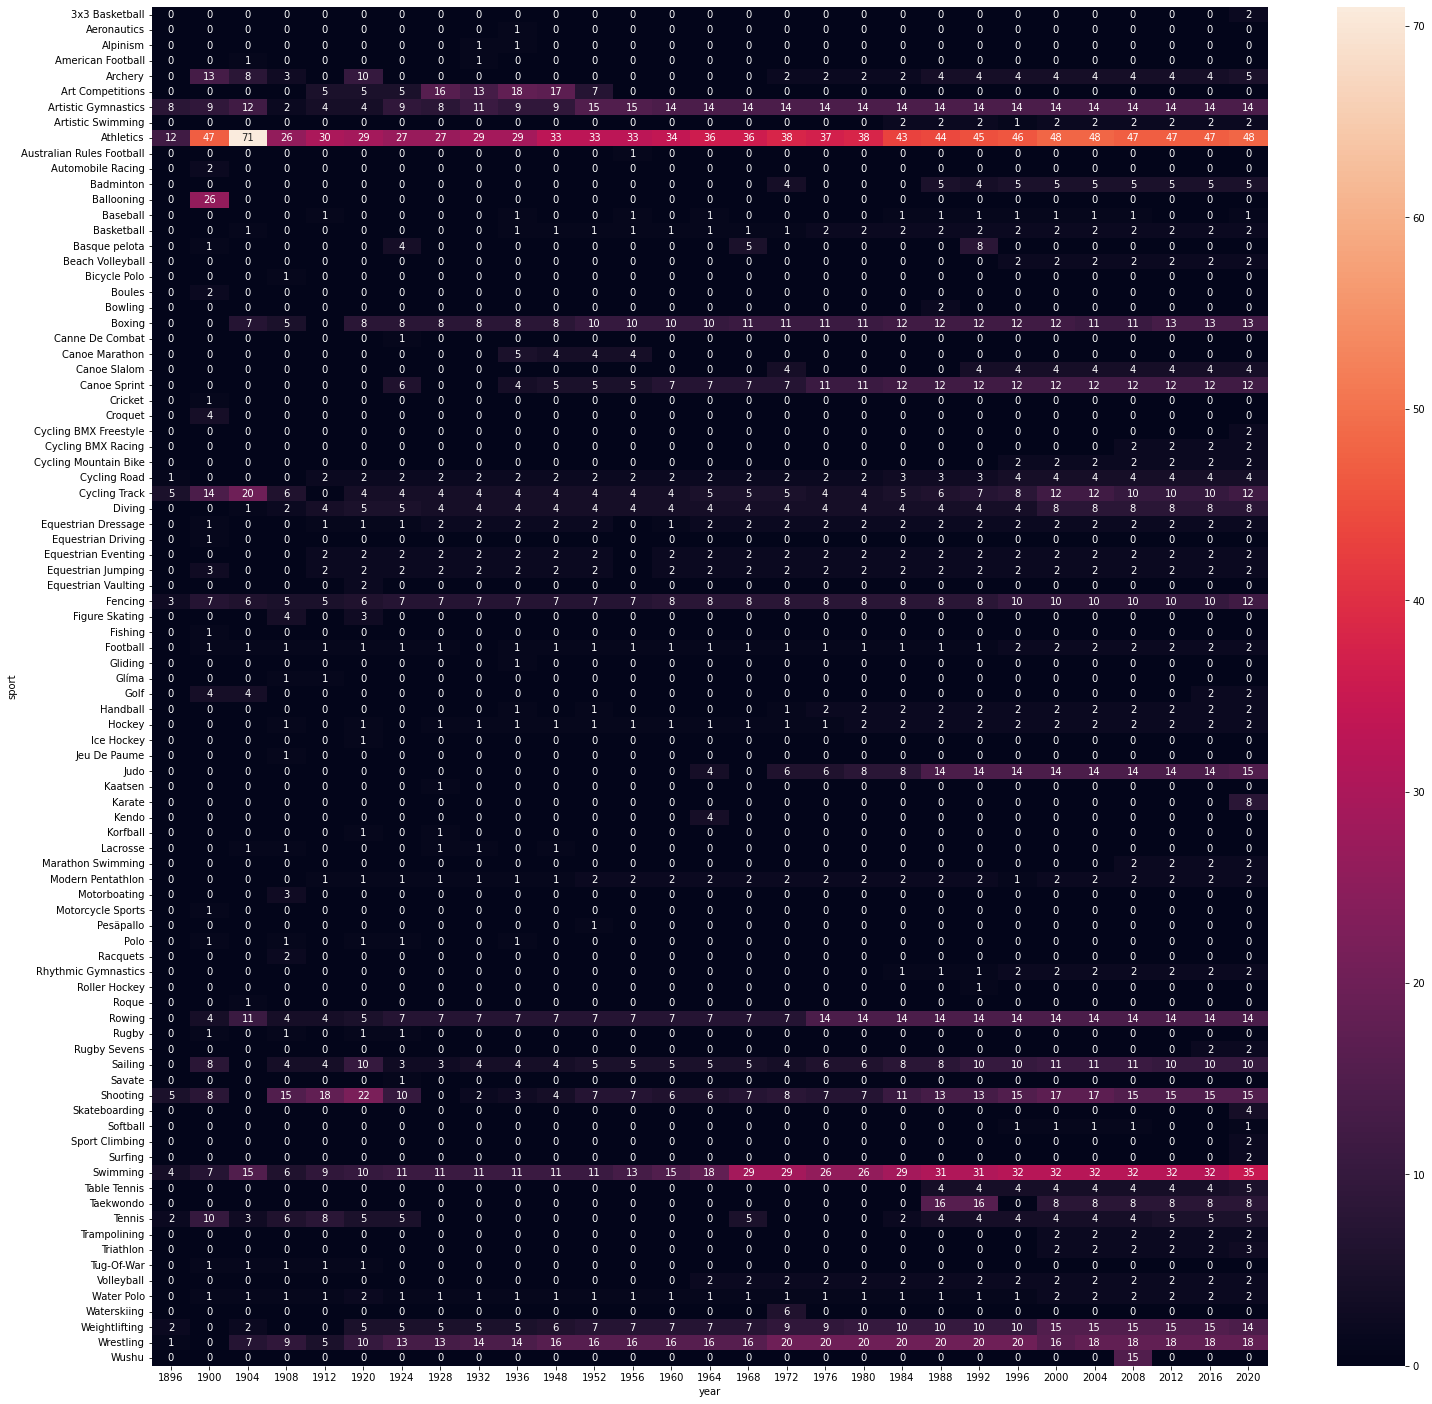

In [50]:
plt.figure(figsize = (25,25))
sns.heatmap(x_summer.pivot_table(index = 'sport', columns = 'year', values = 'event', aggfunc = 'count').fillna(0).astype('int'), annot=True)

### 4. Number of events in every sport over the years in Winter Olympics. 

In [51]:
x_winter = df[df['season'] == 'Winter'].drop_duplicates(['year', 'sport', 'event']).reset_index(drop=True)

1. From the heatmap, first thing to notice is only few sports are there in the Olympics, we can see that Speed Skating is the most played game in Winter Olympics followed by Cross-Country Skiing and Alpine Skiing.
2. There are few games that were played only once or twice in Winter Olympics like Alpinism, Bandy, Ice Stock Sport, Speed Skiing and Winter Pentathlon.
3. Biathlon, Short Track Speed Skating, FreeStyle Skiing have also increased their events uniformly.
4. Bobsleigh, Ice Hockey are some sports that are uniform over the years.

<AxesSubplot:xlabel='year', ylabel='sport'>

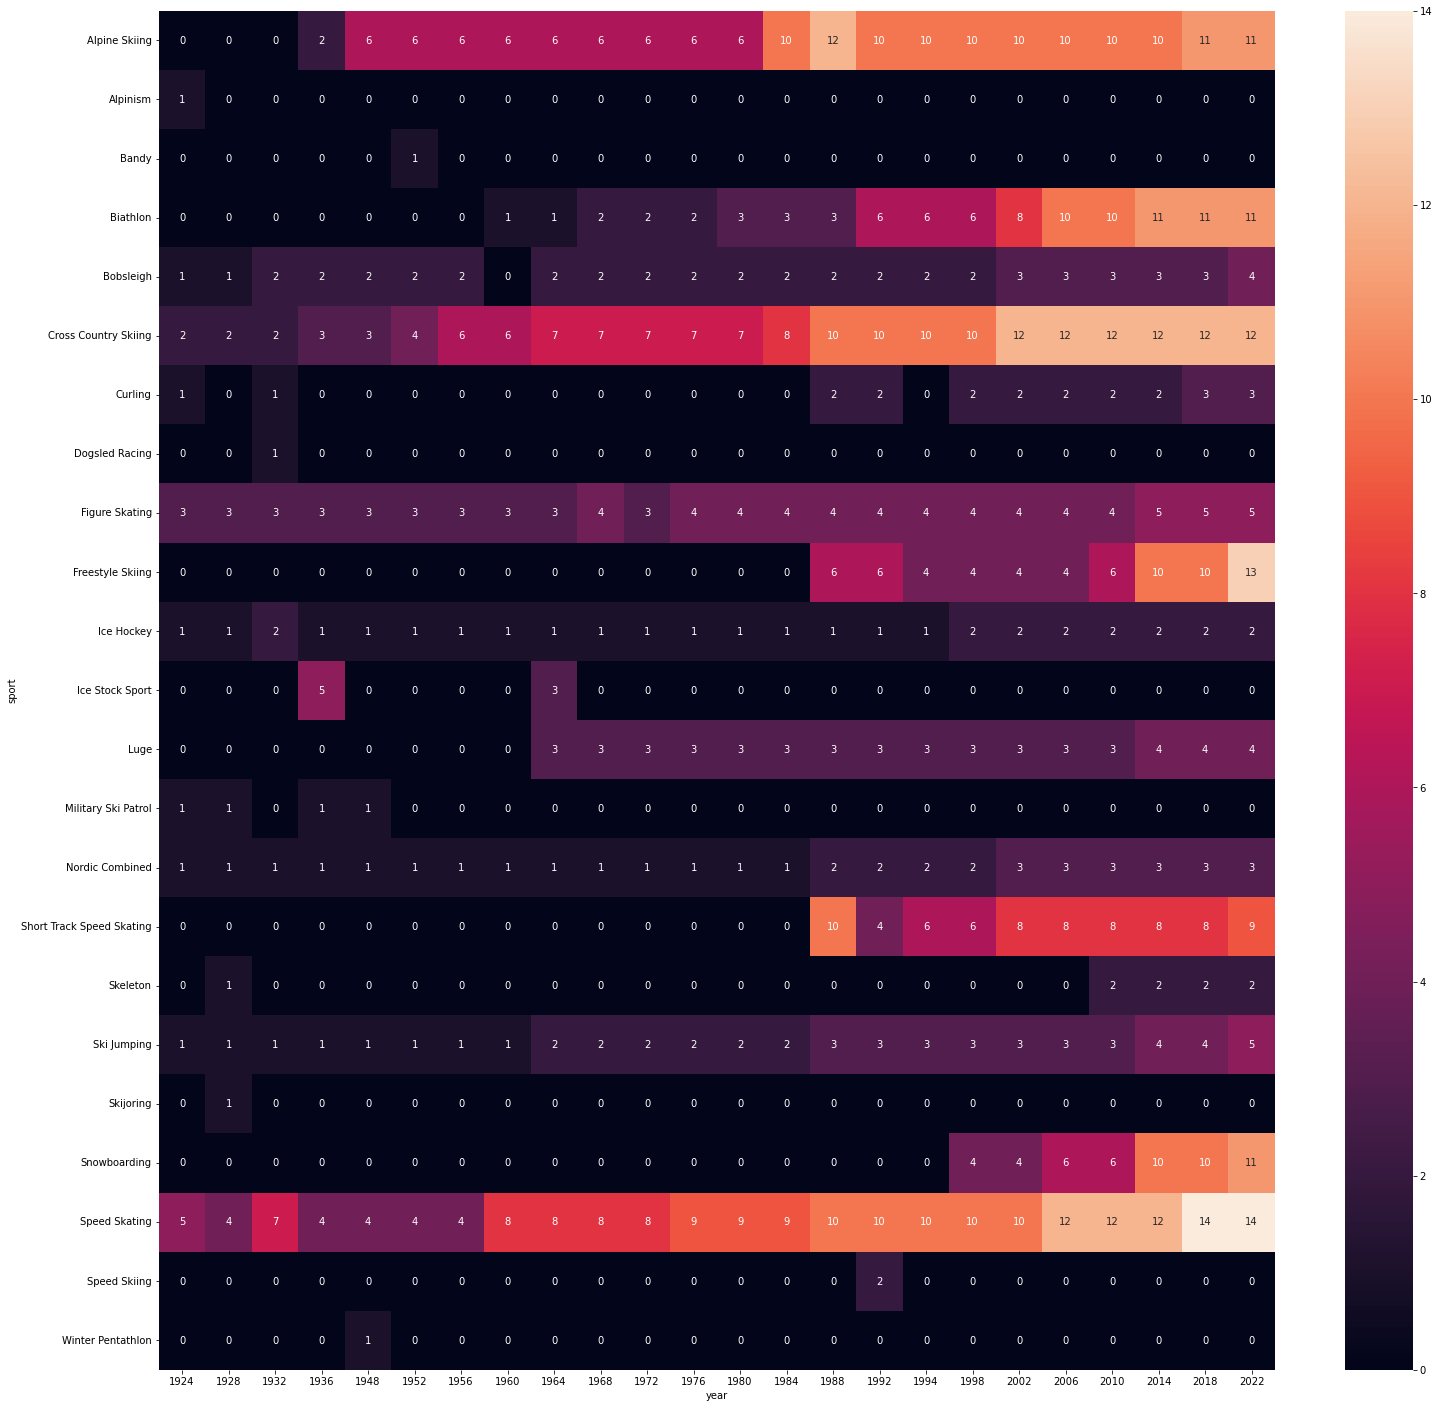

In [52]:
plt.figure(figsize = (25,25))
sns.heatmap(x_winter.pivot_table(index = 'sport', columns = 'year', values = 'event', aggfunc = 'count').fillna(0).astype('int'), annot=True)

### Best Athletes in particular Sport:

In [53]:
# function for best athletes in particular Sport
def best_athletes(df, sport):
  athlete_with_medals = df[df['medal'] != 'na'].reset_index(drop=True)
  if sport == 'OverAll':
    ss = (athlete_with_medals['athlete'].value_counts().reset_index()).merge(athlete_with_medals, right_on = 'athlete', left_on = 'index')
    ss = ss.drop_duplicates(['index']).reset_index()[['index', 'athlete_x', 'sport']]
    ss.rename(columns = {'index':'Athlete', 'athlete_x':'Medals'}, inplace = True)
    ss = ss.drop_duplicates('sport').reset_index(drop=True)
  else:
    ss = athlete_with_medals[athlete_with_medals['sport'] == sport]['athlete'].value_counts().reset_index()
    ss = ss.merge(athlete_with_medals, left_on = 'index', right_on= 'athlete')
    ss = ss[['index', 'athlete_x', 'sport']].drop_duplicates('index').rename(columns = {'index':'Athlete', 'athlete_x':'Medals'}).reset_index(drop=True)

  return ss.head(15)


In [54]:
best_athletes(event_results, 'Diving')

Athlete  Medals   sport
0      Dmitry Sautin       8  Diving
1          Wu Minxia       7  Diving
2       Guo Jingjing       6  Diving
3            Qin Kai       5  Diving
4        Chen Ruolin       5  Diving
5      Klaus Dibiasi       5  Diving
6         Fu Mingxia       5  Diving
7           Xiong Ni       5  Diving
8      Greg Louganis       5  Diving
9   Yuliya Pakhalina       5  Diving
10          Cao Yuan       5  Diving
11   Joaquín Capilla       4  Diving
12   Georgia Coleman       4  Diving
13   Franco Cagnotto       4  Diving
14      Bud Pinkston       4  Diving

In [55]:
# Here, we can change the country to see the medals won by that country over the years in Summer Olympics. 
total_medals_summer = medal_tally[(medal_tally['country'] == 'India') & (medal_tally['season'] == 'Summer')][['year', 'total']].reset_index(drop=True)
fig = px.line(total_medals_summer, x='year', y='total')
fig.show()

In [56]:
# Here, we can change the country to see the medals won by that country over the years in Winter Olympics.
total_medals_winter = medal_tally[(medal_tally['country'] == 'United States') & (medal_tally['season'] == 'Winter')][['year', 'total']].reset_index(drop=True)
fig = px.line(total_medals_winter, x='year', y='total')
fig.show()

### 5) Performance of Countries in different Sports.

In [57]:
# Dropping the duplicate rows on the basis of team, since every member of team win medals but it should be considered one only.
dff = event_results[event_results['medal'] != 'na'].drop_duplicates(['edition', 'sport', 'event', 'pos', 'medal', 'isTeamSport', 'season'])

In [58]:
dff = dff.merge(countries, on='country_noc')

<AxesSubplot:xlabel='year', ylabel='sport'>

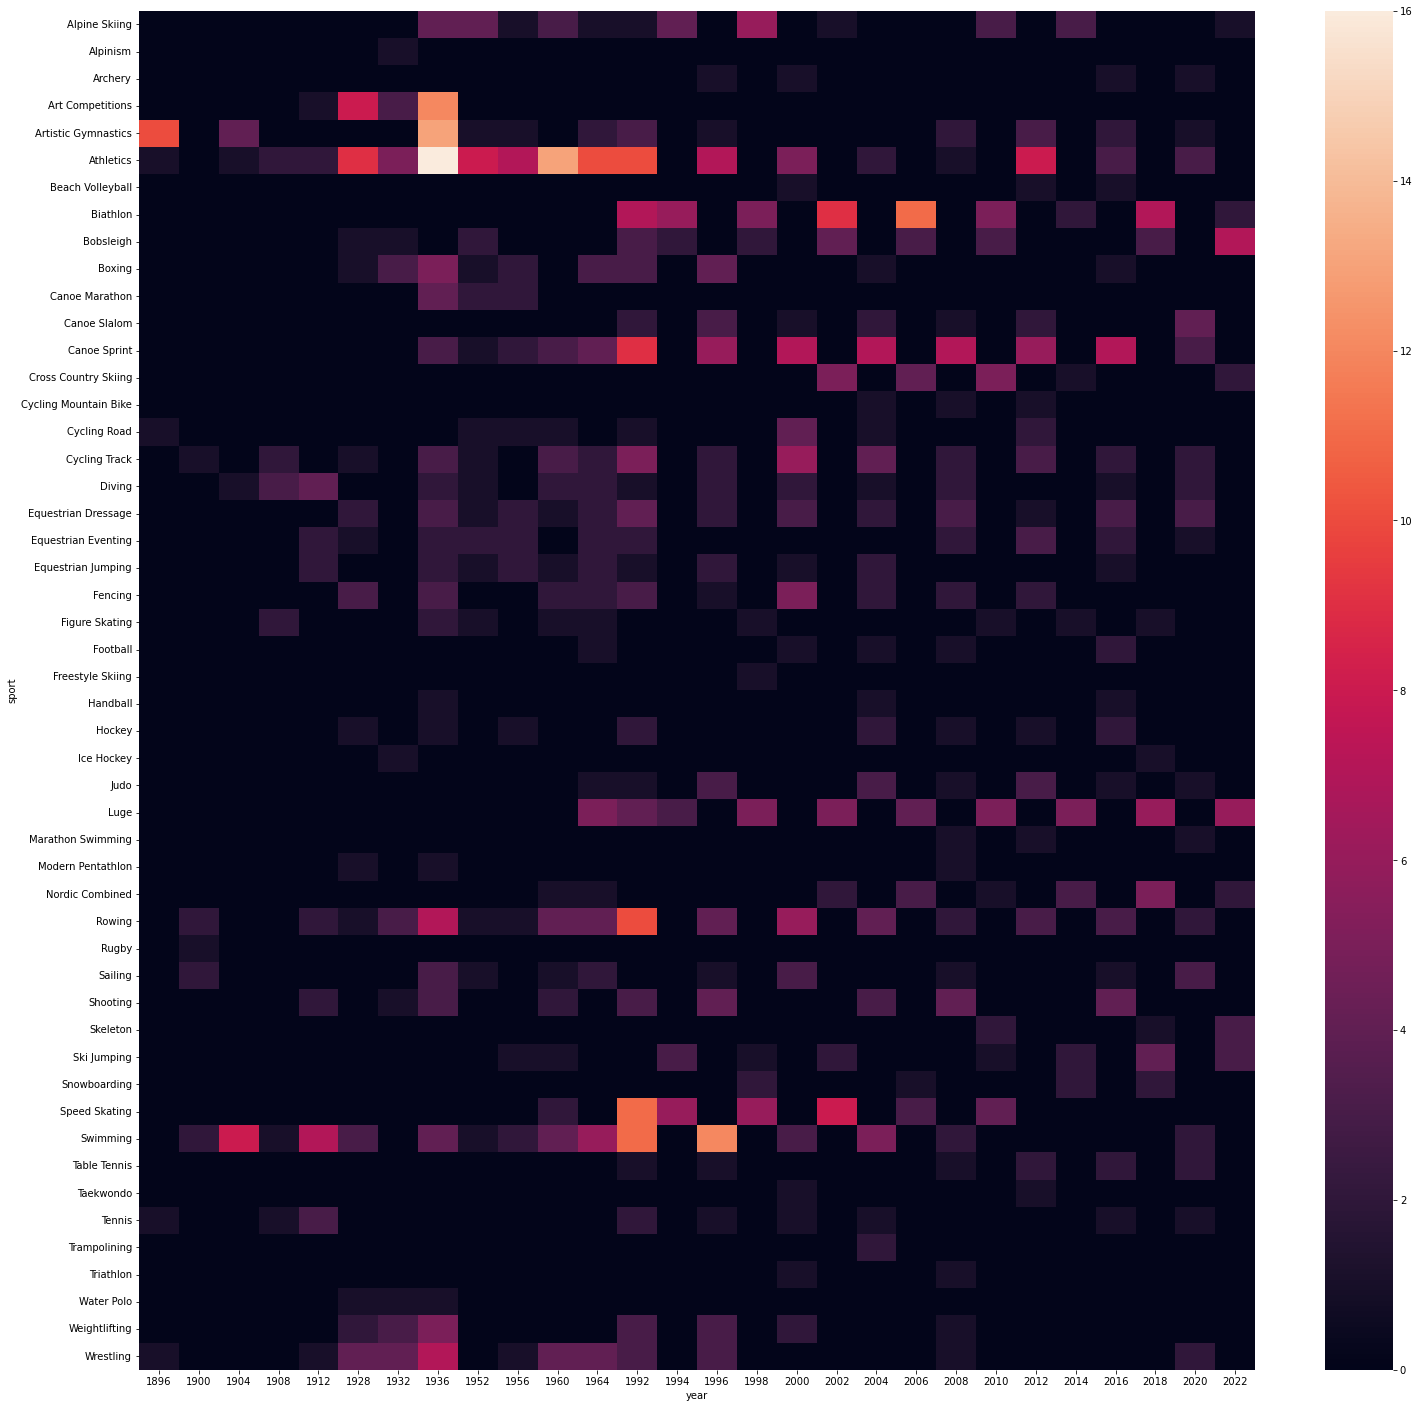

In [59]:
# Again, we can change the country to see the performance of other countries.
dff = dff[dff['country'] == 'Germany']
dff = dff.pivot_table(index='sport', columns='year', values='medal', aggfunc='count').fillna(0).astype('int')
plt.figure(figsize=(25,25))
sns.heatmap(dff)

### Most Successful Athletes in particular Country:

In [60]:
df = event_results.merge(countries,on='country_noc')

In [61]:
df = df[df['medal'] != 'na']

In [62]:
df = df[df['country'] == 'India']['athlete'].value_counts().reset_index().merge(df, left_on = 'index', right_on = 'athlete')
df.drop_duplicates('index')[['index', 'athlete_x', 'country', 'sport']].head(10)

index  athlete_x country   sport
0         Udham Singh          4   India  Hockey
4        Balbir Singh          4   India  Hockey
8     Leslie Claudius          4   India  Hockey
12   Hari Pal Kaushik          3   India  Hockey
15      Richard Allen          3   India  Hockey
18    Prithipal Singh          3   India  Hockey
21      Eric Pinniger          3   India  Hockey
24        V. J. Peter          3   India  Hockey
27  Balbir Singh, Sr.          3   India  Hockey
30        Dhyan Chand          3   India  Hockey

### 6) Age Distribution of Athletes:

Since we don't have 'Age' Column in the data but we have 'born' column, so we need to find age of athletes using born year and the year in which olympic was held. First we will extract the year in which athlete was born from the 'born' column because 'born' column is not uniform. At some places year is not given and place is given, in some both are given, or more than 1 year is given. We will use RegEx for this problem.   

In [63]:
athlete_df = bio.drop_duplicates('athlete_id').merge(event_results.drop_duplicates('athlete_id'), on='athlete_id')

In [64]:
# This function will extract the number from the rows, and if there are more than 1 number in any row it will take the 
# first number as born year
# Also if there is no number in any row that means born year is not given so it will add 'na' as born year.
def find(x):
  try:
    result = re.findall(r'\d+',x)[0]
  except IndexError:
    result = 'na'
  return result

In [65]:
athlete_df['born_year'] = athlete_df['born'].apply(lambda x: find(x))

In [66]:
# We have drop the rows with 'na' as born year.
athlete_df = athlete_df[athlete_df['born_year'] != 'na']

In [67]:
athlete_df['age'] = athlete_df['year'].astype('int') - athlete_df['born_year'].astype('int')

In [68]:
athlete_df['age'].dtype

dtype('int32')

In [69]:
x1 = athlete_df['age']
x2 = athlete_df[athlete_df['medal'] == 'Gold']['age']
x3 = athlete_df[athlete_df['medal'] == 'Silver']['age']
x4 = athlete_df[athlete_df['medal'] == 'Bronze']['age']

fig = ff.create_distplot([x1,x2,x3,x4], ['OverAll', 'Gold', 'Silver', 'Bronze'], show_hist=False, show_rug=False)
fig.show()

### 7) Age Distribution of Athletes in different Sports:

In [70]:
famous_sports = athlete_df['sport'].value_counts().head(49).index.tolist()

In [71]:
# Getting list of Sports with the age distribution respectively.
x = []
sport_name = []
for i in famous_sports:
  sport_df = athlete_df[athlete_df['sport'] == i]
  x.append(sport_df[sport_df['medal'] == 'Gold']['age'])
  sport_name.append(i)

From the graph, we can see many things like:
1. In Rhythmic Gymnastics Sport , age matters, mostly people are are nearly 17-18 years old have won the most medals that's why the graph has sharp peak. Also after certain age like 25-26 years old , athletes doesn't participate in this Sport.
2. In Art Competition , Shooting like sports age doesn't matter, many people won the medals in different age groups.
3. In some Sports like Curling, athletes partcipate even at the age of 60 years and in sports like Swimming athletes usually not participate after 30s.

In [72]:
fig = ff.create_distplot(x, sport_name, show_hist=False, show_rug=False)
fig.show()

### 8) Weight VS Height in different Sports:

We have ranges in our 'weight' column. So, first we will extract the lower limit and upper limit of the range and fill find the mean of that as the value of 'weight'. Also we have 'na' values also in both the columns 'height' and 'weight' but 'height' column doesn't have outliers but 'weight' column has some outliers that can effect the mean of the data. So, to fill 'na' values we will use mean in 'height' column and median in 'weight' column.

In [73]:

def avg(x):
  try:
    lst = [eval(i) for i in re.findall(r'\d+',x)]
    result = sum(lst)/len(lst)
  except ZeroDivisionError:
    result = 'na'
  return result

In [74]:
athlete_df['weight'] = athlete_df['weight'].apply(lambda x: avg(x))

In [75]:
athlete_df['weight'].replace('na', athlete_df[athlete_df['weight'] != 'na']['weight'].median(), inplace=True)

In [76]:
athlete_df['height'].replace('na', athlete_df[athlete_df['height'] != 'na']['height'].astype('float').mean(), inplace=True)

In [77]:
athlete_df['height'] = athlete_df['height'].astype('float')

<AxesSubplot:xlabel='weight', ylabel='height'>

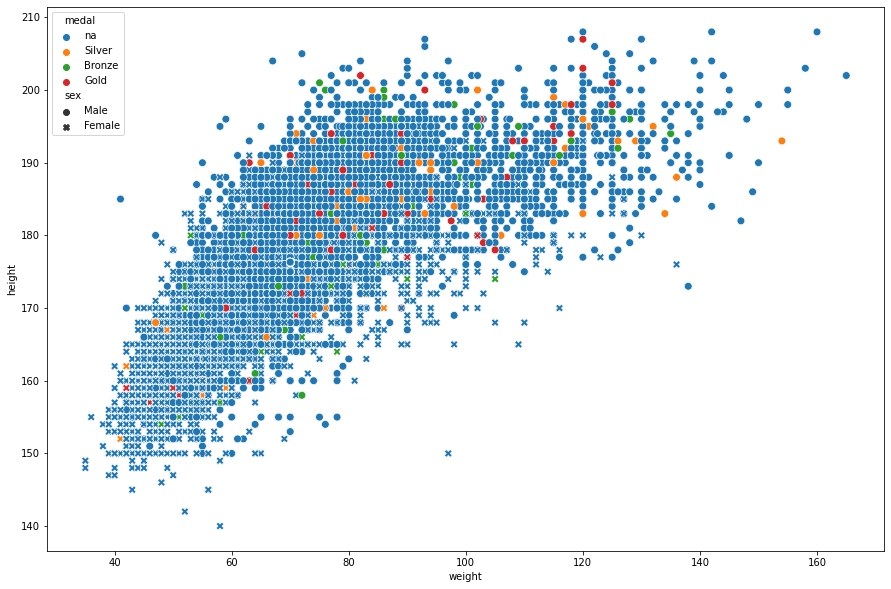

In [78]:
# We can change the sport here to see the height vs weight distribution is different Sports.
sport_df = athlete_df[athlete_df['sport'] == 'Athletics']
plt.figure(figsize=(15,10))
sns.scatterplot(data = sport_df, x = 'weight', y = 'height', hue = 'medal', style='sex', s=60)

### 9) Participation of Men and Women over the years in Summer and Winter Olympics:

Since we not have 'sex' column in our 'event_results' dataset, either we can extract it using 'event' column or we can merge 'event_results' dataset with bio. We are going with the 2nd option since the format of 'event' column is not uniform.

In [79]:
df = bio.merge(event_results, on='athlete_id')  

In [80]:
# for Summer Olympics
men_df_summer = df[(df['sex'] == 'Male') & (df['season'] == 'Summer')].groupby('year')['athlete_id'].nunique().reset_index()
women_df_summer = df[(df['sex'] == 'Female') & (df['season'] == 'Summer')].groupby('year')['athlete_id'].nunique().reset_index()

In [81]:
final = women_df_summer.merge(men_df_summer, on='year')

In [82]:
final

year  athlete_id_x  athlete_id_y
0   1896             2           241
1   1900            30          1652
2   1904             6          1361
3   1908            54          2358
4   1912            62          2813
5   1920           106          2771
6   1924           170          3755
7   1928           357          3445
8   1932           206          1839
9   1936           384          4641
10  1948           467          4348
11  1952           551          4958
12  1956           376          3004
13  1960           638          4935
14  1964           706          4710
15  1968           812          4970
16  1972          1119          6273
17  1976          1308          4911
18  1980          1164          4219
19  1984          1658          5548
20  1988          2395          6659
21  1992          2808          7037
22  1996          3573          6933
23  2000          4141          6682
24  2004          4410          6411
25  2008          4761          6472
26  2012          4776          5992
27  2016          5137          6268
28  2020          5539          6010

In [83]:
final.rename(columns = {'athlete_id_x':'women', 'athlete_id_y':'men'}, inplace=True)

In [84]:
fig = px.line(final, x='year', y=['men','women'])
fig.show()

In [85]:
# for Winter Olympics
men_df_winter = df[(df['sex'] == 'Male') & (df['season'] == 'Winter')].groupby('year')['athlete_id'].nunique().reset_index()
women_df_winter = df[(df['sex'] == 'Female') & (df['season'] == 'Winter')].groupby('year')['athlete_id'].nunique().reset_index()

In [86]:
final_winter = women_df_winter.merge(men_df_winter, on='year')

In [87]:
final_winter.rename(columns = {'athlete_id_x':'women', 'athlete_id_y':'men'}, inplace=True)

In [88]:
fig = px.line(final_winter, x='year', y=['men','women'])
fig.show()